<a href="https://colab.research.google.com/github/shumshersubashgautam/Bioinformatics-Drug-Discovery/blob/main/Drugdiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:48
🔁 Restarting kernel...


In [ ]:
!mamba install -yq rdkit


  Package               Version  Build                Channel                    Size
───────────────────────────────────────────────────────────────────────────────────────
  Install:
───────────────────────────────────────────────────────────────────────────────────────

  boost                  1.74.0  py37h6dcda5c_3       conda-forge/linux-64     342 KB
  boost-cpp              1.74.0  hc6e9bd1_3           conda-forge/linux-64      16 MB
  cairo                  1.16.0  h6cf1ce9_1008        conda-forge/linux-64       1 MB
  cycler                 0.10.0  py_2                 conda-forge/noarch         9 KB
  fontconfig             2.13.1  hba837de_1005        conda-forge/linux-64     357 KB
  freetype               2.10.4  h0708190_1           conda-forge/linux-64     890 KB
  gettext              0.19.8.1  h0b5b191_1005        conda-forge/linux-64       4 MB
  greenlet                1.1.0  py37hcd2ae1e_0       conda-forge/linux-64      83 KB
  importlib-metadata      4.6.4  py37h

In [ ]:
#data handling
import numpy as np
import pandas as pd

# chemistry
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D

# machine learning
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# plotting
import matplotlib.pyplot as plt

In [ ]:
# Read activity data for EGFR into a pandas dataframe named df
egfr_chembl25_link = '/content/ai_in_medicine/data/egfr_chembl25.csv'
#################### <-- insert code below
df = pd.read_csv ('/content/ai_in_medicine/data/egfr_chembl25.csv')
print(df)

#################### <-- insert code above

          chembl_id  ...  IC50[nM]
0      CHEMBL207869  ...     77.00
1     CHEMBL3940060  ...    330.00
2     CHEMBL3678951  ...      1.00
3      CHEMBL504034  ...     40.00
4      CHEMBL158797  ...  43000.01
...             ...  ...       ...
4904    CHEMBL94061  ...      0.22
4905    CHEMBL94123  ...    215.00
4906    CHEMBL94275  ...   1000.00
4907    CHEMBL95320  ...    850.00
4908    CHEMBL98798  ...   7600.00

[4909 rows x 3 columns]


In [ ]:
!git clone https://github.com/volkamerlab/ai_in_medicine.git

Cloning into 'ai_in_medicine'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 553 (delta 86), reused 98 (delta 35), pack-reused 394
Receiving objects: 100% (553/553), 65.76 MiB | 31.79 MiB/s, done.
Resolving deltas: 100% (247/247), done.


Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1


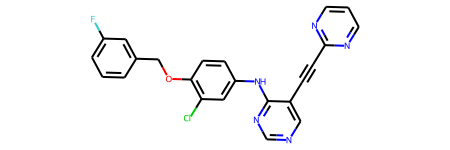

In [ ]:
# pick the first SMILES stored in the dataframe and display the molecule with RDKit
print(df['smiles'][0])
mol = Chem.MolFromSmiles(df['smiles'][0])
mol

In [ ]:
maccs_keys = list(MACCSkeys.GenMACCSKeys(mol))
print(maccs_keys)
print('Zeros:', len(maccs_keys) - sum(maccs_keys))
print('Ones:', sum(maccs_keys))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]
Zeros: 129
Ones: 38


In [ ]:
# Get indices of ones
maccs_key_series = pd.Series(maccs_keys)
maccs_key_series[maccs_key_series==1].index

Int64Index([ 17,  38,  42,  65,  77,  80,  87,  98, 103, 107, 109, 113, 120,
            121, 125, 126, 127, 133, 134, 135, 137, 142, 143, 144, 145, 150,
            151, 152, 153, 155, 156, 157, 158, 161, 162, 163, 164, 165],
           dtype='int64')

In [ ]:
pwd

'/content'

In [ ]:
!git clone https://github.com/volkamerlab/teachopencadd.git

Cloning into 'teachopencadd'...
remote: Enumerating objects: 6493, done.
remote: Counting objects: 100% (1142/1142), done.
remote: Compressing objects: 100% (483/483), done.
remote: Total 6493 (delta 727), reused 1040 (delta 647), pack-reused 5351
Receiving objects: 100% (6493/6493), 503.55 MiB | 27.97 MiB/s, done.
Resolving deltas: 100% (3998/3998), done.


In [ ]:
cd /content/teachopencadd/teachopencadd/talktorials/T002_compound_adme

/content/teachopencadd/teachopencadd/talktorials/T002_compound_adme


In [ ]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [ ]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [ ]:
smiles = [
    "CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C",
    "CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O",
]
names = ["cyclosporine", "clozapine", "beta-carotene", "cannabidiol"]

,name,smiles,ROMol
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,

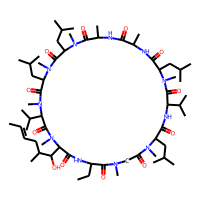
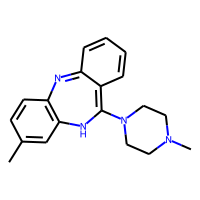
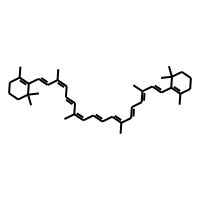
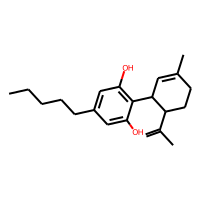

In [ ]:
molecules = pd.DataFrame({"name": names, "smiles": smiles})
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")
molecules

In [ ]:
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)
# Colors are used for plotting the molecules later
molecules["color"] = ["red", "green", "blue", "cyan"]
# NBVAL_CHECK_OUTPUT
molecules[["molecular_weight", "n_hba", "n_hbd", "logp"]]

,molecular_weight,n_hba,n_hbd,logp
0,1201.841368,12,5,3.26900
1,306.184447,4,1,1.68492
2,536.438202,0,0,12.60580
3,314.224580,2,2,5.84650


,name,smiles,ROMol,molecular_weight,n_hba,n_hbd,logp,color
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,,1201.841368,12,5,3.26900,red
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,,306.184447,4,1,1.68492,green
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,,536.438202,0,0,12.60580,blue
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,,314.224580,2,2,5.84650,cyan

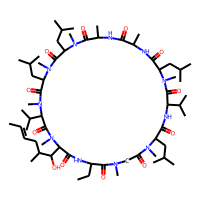
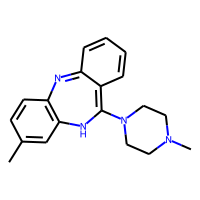
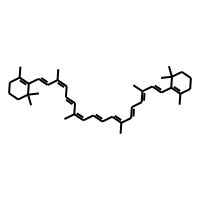
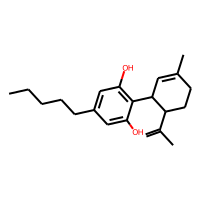

In [ ]:
# Full preview
molecules

In [ ]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

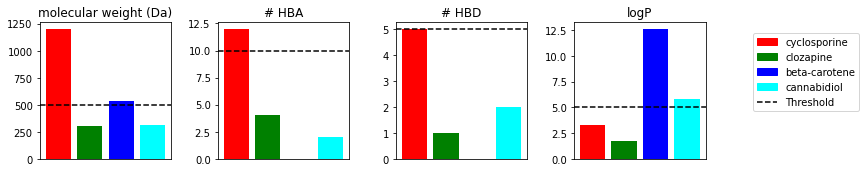

In [ ]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(molecules) + 1)
colors = ["red", "green", "blue", "cyan"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([1, 2, 3, 4], molecules[key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [
    mpatches.Patch(color=row["color"], label=row["name"]) for index, row in molecules.iterrows()
]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

In [ ]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [ ]:
# NBVAL_CHECK_OUTPUT
for name, smiles in zip(molecules["name"], molecules["smiles"]):
    print(f"Ro5 fulfilled for {name}: {calculate_ro5_properties(smiles)['ro5_fulfilled']}")

Ro5 fulfilled for cyclosporine: False
Ro5 fulfilled for clozapine: True
Ro5 fulfilled for beta-carotene: False
Ro5 fulfilled for cannabidiol: True


In [ ]:
molecules = pd.read_csv(HERE / "../T001_query_chembl/data/EGFR_compounds.csv", index_col=0)
print(molecules.shape)
molecules.head()

(5444, 5)


,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


In [ ]:
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,349.021459,3,1,5.2891,True
1,387.058239,5,1,4.9333,True
2,343.043258,5,1,3.5969,True
3,329.027607,5,2,3.5726,True
4,339.011957,4,2,4.0122,True
